In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Задача 1

In [2]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [3]:
def plot(k1, k2, k3):
    plt.figure(figsize=(15, 6))
    grid = np.linspace(1, 15, 100)
    y = [f(i) for i in grid]
    
    w1 = [k1[0] + k1[1] * i for i in grid]
    w2 = [k2[0] + k2[1] * i + k2[2] * (i ** 2) for i in grid]
    w3 = [k3[0] + k3[1] * i + k3[2] * (i ** 2) + k3[3] * (i ** 3) for i in grid]
    w = [w1, w2, w3]
    
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.plot(grid, y)
        plt.plot(grid, w[i])
        plt.minorticks_on()
        plt.grid(True)
        plt.grid(True, which='minor', linestyle=':')
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        stats = (f'мн-н степени {i+1}')
        bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
        plt.text(15, 3.2, stats, fontsize=10, bbox=bbox, horizontalalignment='right')
    plt.show()
    return

In [4]:
A = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])
koeff1 = np.linalg.solve(A, b)
koeff1

array([ 3.43914511, -0.18692825])

In [5]:
A = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([f(1), f(8), f(15)])
koeff2 = np.linalg.solve(A, b)
koeff2

array([ 3.32512949, -0.06531159, -0.00760104])

In [6]:
A = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 15 ** 2, 15 **3]])
b = np.array([f(1), f(4), f(10), f(15)])
koeff3 = np.linalg.solve(A, b)
koeff3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

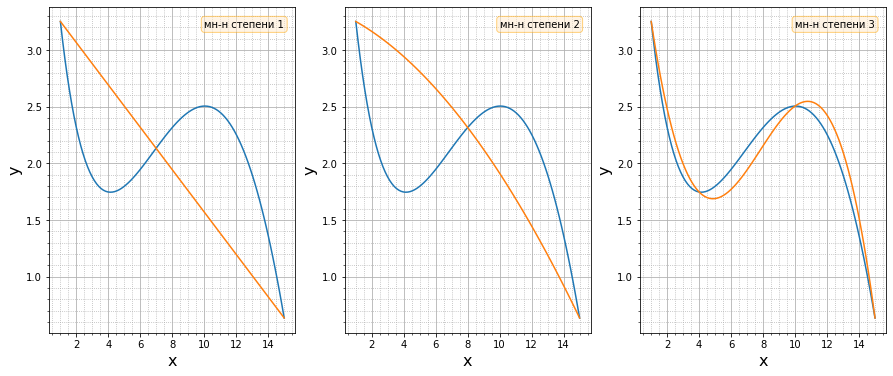

In [7]:
plot(koeff1, koeff2, koeff3)

**Вывод**:
Чем выше степень многочлена, тем лучше он приближает кривую.

# Задача 2

In [8]:
def is_any_not_null(v1, v2):
    v = v1 + v2
    return np.count_nonzero(v)

In [9]:
def is_all_not_null(v1, v2):
    v = v1 * v2
    return np.count_nonzero(v)

In [10]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

answer1 = is_any_not_null(x, y)
answer2 = is_all_not_null(x, y)
print('Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент:', answer1)
print('Количество позиций, для которых элементы в обоих векторах ненулевые:', answer2)

Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент: 6
Количество позиций, для которых элементы в обоих векторах ненулевые: 2


# Задача 3

In [11]:
def repeat(a, rep):
    return np.repeat(a, rep)

In [12]:
x = [1, 2, 0]
N = 3
print(repeat(x, N))

[1 1 1 2 2 2 0 0 0]


# Задача 4

In [13]:
def max_after_zero(a):
    a_final = a[1:] - a[:-1]
    ind = np.argwhere(a_final==a[1:])
    return np.max(np.take(a[1:], ind))

In [14]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])

In [15]:
y = np.array([0, 1, 0, 15, 17, 2, 0, 4, 0])

In [16]:
max_after_zero(y)

15

# Задача 5

In [17]:
def replace_zeros(x):
    nz = np.argwhere(x!=0)
    r = np.concatenate((nz.squeeze(), [len(x)]))
    r = r[1:] - r[:-1]
    return np.repeat(x[nz], r)

In [18]:
x = np.array([6, 0, 11, 0, 0, -7, 2, 0, 4, 0, 0, 0, 0])

In [19]:
replace_zeros(x)

array([ 6,  6, 11, 11, 11, -7,  2,  2,  4,  4,  4,  4,  4])

# Задача 6

In [20]:
def ln(x, N):
    koeff = np.fromfunction(lambda a, b: ((-1) ** (b + 2)) * (x ** (b + 1)) / (b + 1), (1, N))
    return np.sum(koeff)

In [21]:
a = 0.7
n = 100
print(np.log(1 + a))
print(ln(a, n))

0.5306282510621704
0.5306282510621704


# Задача 7

In [22]:
def mean(a):
    values, counts = np.unique(a, return_counts=True)
    return np.sum(a) / np.sum(counts)

In [23]:
def mean_axes(x):
    return np.sum(x, axis=0) / x.shape[0]

In [24]:
def cov_matrix(a):
    delta = a.T - mean_axes(a.T)
    return delta.T @ delta / (np.shape(a.T)[0] - 1)

In [25]:
x = np.array([[175, 4], [20, 2], [25, 8]])

In [26]:
np.mean(x) - mean(x)

0.0

In [27]:
np.cov(x) - cov_matrix(x)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])